In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)


In [7]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

In [8]:
# Esplorazione del dataset
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
class_counts = df['target'].value_counts().sort_index()
stats = df.iloc[:, :-1].describe().T

print("Class counts:")
print(class_counts)
print("\nStatistics:")
print(stats)

Class counts:
target
0    59
1    71
2    48
Name: count, dtype: int64

Statistics:
                              count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                      

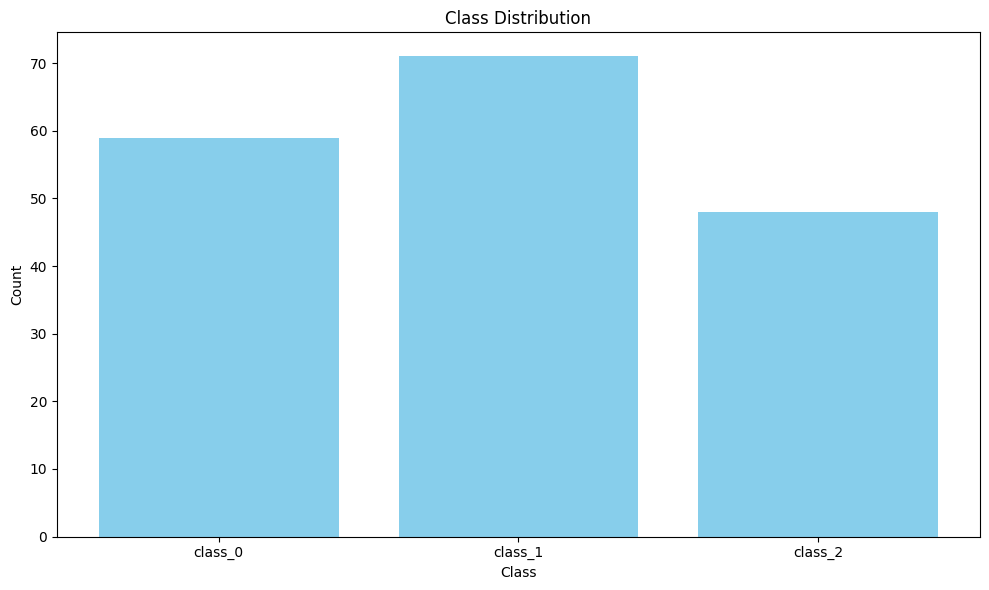

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

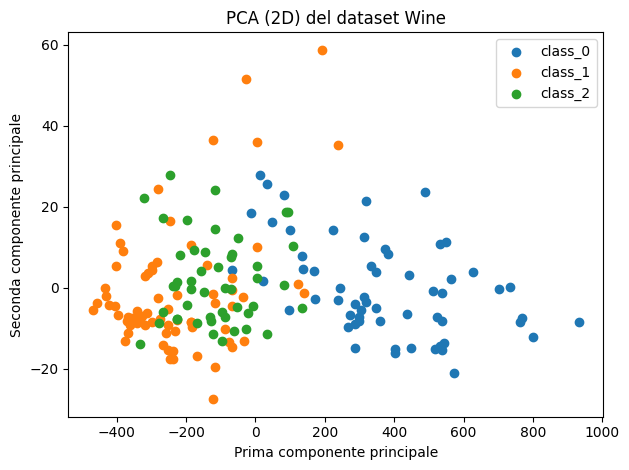

In [10]:
# 3. PCA a 2 componenti principali
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
for i, name in enumerate(class_names):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        label=name
    )
plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")
plt.title("PCA (2D) del dataset Wine")
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
# 4. Suddivisione in training e test set (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Applicazione di RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 6. Valutazione delle performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nAccuracy:  {acc:.2f}")
print(f"Precision (macro): {prec:.2f}")
print(f"Recall (macro):    {rec:.2f}")
print(f"F1-score (macro):  {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy:  1.00
Precision (macro): 1.00
Recall (macro):    1.00
F1-score (macro):  1.00

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



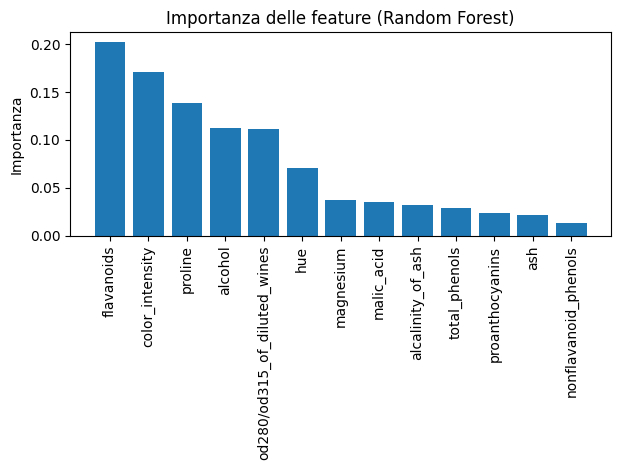

In [14]:
# 7. Importanza delle feature
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.bar(np.array(feature_names)[indices], importances[indices])
plt.xticks(rotation=90)
plt.ylabel("Importanza")
plt.title("Importanza delle feature (Random Forest)")
plt.tight_layout()
plt.show()

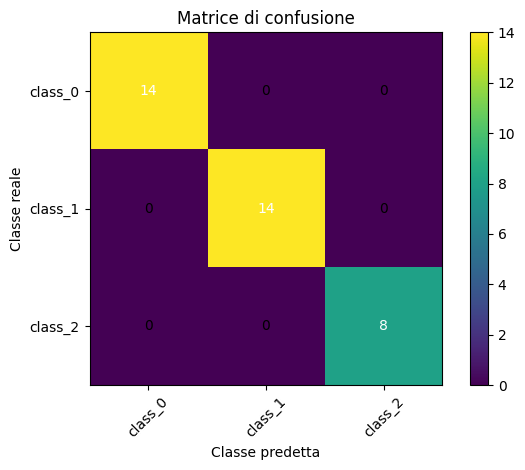

In [15]:
# 8. Matrice di confusione e heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Matrice di confusione")
plt.colorbar()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names, rotation=45)
plt.yticks(ticks, class_names)
threshold = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > threshold else "black")
plt.ylabel("Classe reale")
plt.xlabel("Classe predetta")
plt.tight_layout()

In [16]:
# 9. Ottimizzazione con GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

print("\nBest parameters trovati:")
print(grid.best_params_)
print(f"Best CV accuracy: {grid.best_score_:.2f}")


Best parameters trovati:
{'max_depth': None, 'n_estimators': 100}
Best CV accuracy: 0.98
